# Successive halving
---------------------------------

This example shows how to compare multiple tree-based models using successive halving.

Import the boston dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#boston-dataset).
 This is a small and easy to train dataset whose goal is to predict house prices.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_boston
from atom import ATOMRegressor

In [2]:
# Load the dataset's features and targets
X, y = load_boston(return_X_y=True)

## Run the pipeline

In [3]:
atom = ATOMRegressor(X, y, verbose=1, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: regression.
Applying data cleaning...

Dataset stats ================= >>
Shape: (506, 14)
Scaled: False
----------------------------------
Size of training set: 405
Size of test set: 101



In [4]:
# We can compare tree-based models via successive halving
atom.successive_halving(['tree', 'bag', 'et', 'rf', 'lgb', 'catb'],
                        metric='mae',
                        bagging=5)


Running pipeline ============================= >>
Metric: neg_mean_absolute_error


Run 0 (17% of set) ============================>>
Models in pipeline: Tree, Bag, ET, RF, LGB, CatB
Size of training set: 67
Size of test set: 101


Results for Decision Tree:         
Fitting -----------------------------------------
Score on the train set --> neg_mean_absolute_error: -0.0000
Score on the test set  --> neg_mean_absolute_error: -3.3257
Time elapsed: 0.008s
Bagging -----------------------------------------
Score --> neg_mean_absolute_error: -4.3307 ± 0.5250
Time elapsed: 0.020s
-------------------------------------------------
Total time: 0.033s


Results for Bagging Regressor:         
Fitting -----------------------------------------
Score on the train set --> neg_mean_absolute_error: -1.3054
Score on the test set  --> neg_mean_absolute_error: -2.6950
Time elapsed: 0.020s
Bagging -----------------------------------------
Score --> neg_mean_absolute_error: -3.0957 ± 0.2677
Time elapsed:

## Analyze results

In [5]:
# Note that the results dataframe now is multi-index
atom.results

name   score_train  score_test time_fit  mean_bagging  \
run model                                                                       
0   Tree       Decision Tree -0.000000e+00   -3.325743   0.008s     -4.330693   
    Bag    Bagging Regressor -1.305373e+00   -2.695050   0.020s     -3.095663   
    ET           Extra-Trees -2.256238e-14   -2.154089   0.107s     -2.555434   
    RF         Random Forest -1.150866e+00   -2.414297   0.113s     -2.957400   
    LGB             LightGBM -3.420518e+00   -4.559962   0.025s     -4.839315   
    CatB            CatBoost -8.055503e-02   -2.398431   0.764s     -2.916470   
1   ET           Extra-Trees -2.315185e-14   -2.236079   0.100s     -2.601648   
    CatB            CatBoost -2.835499e-01   -2.419625   0.979s     -2.568085   
    RF         Random Forest -9.819778e-01   -2.505465   0.134s     -2.614416   
2   CatB            CatBoost -3.977985e-01   -1.877205   1.197s     -2.050118   

           std_bagging time_bagging    time  
run model                                    
0   Tree      0.525026       0.020s  0.033s  
    Bag       0.267668       0.088s  0.112s  
    ET        0.170823       0.379s  0.490s  
    RF        0.225311       0.545s  0.662s  
    LGB       0.268167       0.068s  0.099s  
    CatB      0.256428       3.056s  3.822s  
1   ET        0.289034       0.421s  0.525s  
    CatB      0.211868       3.663s  4.647s  
    RF        0.118758       0.611s  0.750s  
2   CatB      0.089185       5.347s  6.548s

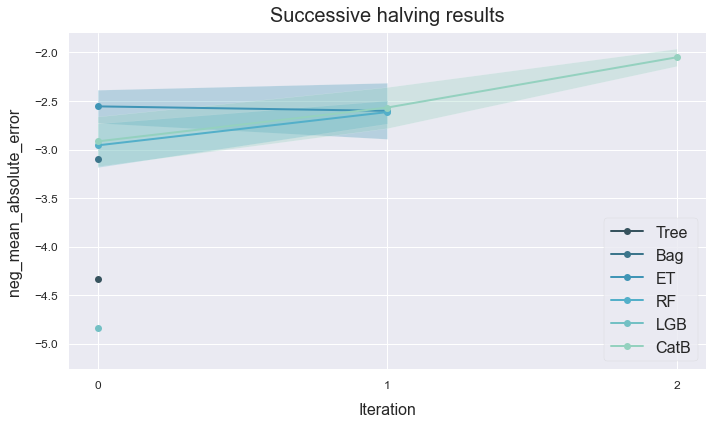

In [6]:
# Plot the successive halving's results
atom.plot_successive_halving()